# Imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.exposure import equalize_adapthist
from skimage.filters import sobel

from src.models import InputImage
from src.well import find_well_props

# Functions

In [2]:
def plot_images(images, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary'):
    if count is not None:
        images = images[0:count]

    l = len(images)

    if cols is None:
        cols = 4
    rows = int(l / cols)
    if l < cols: cols = l
    if l % cols != 0 or rows == 0:
        rows += 1

    fig, ax = plt.subplots(rows, cols, figsize=fig)
    ax = ax.ravel()
    for i, img in enumerate(images):
        if i >= l: return

        if not ticks:  # turn off ticks
            ax[i].get_xaxis().set_visible(False)
            ax[i].get_yaxis().set_visible(False)

        ax[i].imshow(img, cmap)

In [3]:
def plot_fishes(fishes, cols: int = None, count: int = None, fig: (int, int) = (16, 16), ticks=False, cmap='binary'):
    images = list(map(lambda x: x.processed, fishes))  # Change this!
    plot_images(images, cols, count, fig, ticks, cmap)

# Fishes in extracted wells

In [83]:
fishes = [InputImage("zf1.JPG"), InputImage("zf2.JPG"), InputImage("zf3.JPG"), InputImage("zf4.JPG"),
          InputImage("zf5.JPG"), InputImage("zf6.JPG")]

for fish in fishes:
    fish = find_well_props(fish)

# Searching for well properties
_____________________________________________________________
# Hough-transformation for the well
_____________________________________________________________
# Hough-transformation finished
_____________________________________________________________
# Creating circle mask for well
_____________________________________________________________
# Circle mask for well created
_____________________________________________________________
# Creating remaining masks:
_____________________________________________________________
# Creating cropped mask
_____________________________________________________________
# Creating masked image (original)
_____________________________________________________________
# Creating masked image (cropped)
_____________________________________________________________
# Created remaining masks
_____________________________________________________________
# Finished searching for well properties
_____________________________

## Functions

In [74]:
def edge_finding(img: np.ndarray) -> np.ndarray:  # Function replacing edge filter
    edges = sobel(img)  # rangefilter
    return equalize_adapthist(edges)  # strech contrast

In [75]:
def denoising(img: np.ndarray, strength = 20) -> np.ndarray:
    return cv2.fastNlMeansDenoising(img, None, strength)  # denoise

In [77]:
def adaptiveTh(img:np.ndarray, block_size=7)-> np.ndarray:
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, 1)

# Rangefilter*

In [84]:
edge = []
"""for fish in fishes:
    edges = edge_finding(fish.processed) # rangefilter
    n = cv2.normalize(src=edges, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)  # normalize for uint8
    fish.processed = n.astype(np.uint8)  # convert to uint8"""
for fish in fishes:
    a = edge_finding(fish.processed)
    n = cv2.normalize(src=a, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)  # normalize for uint8
    edge.append(n.astype(np.uint8))

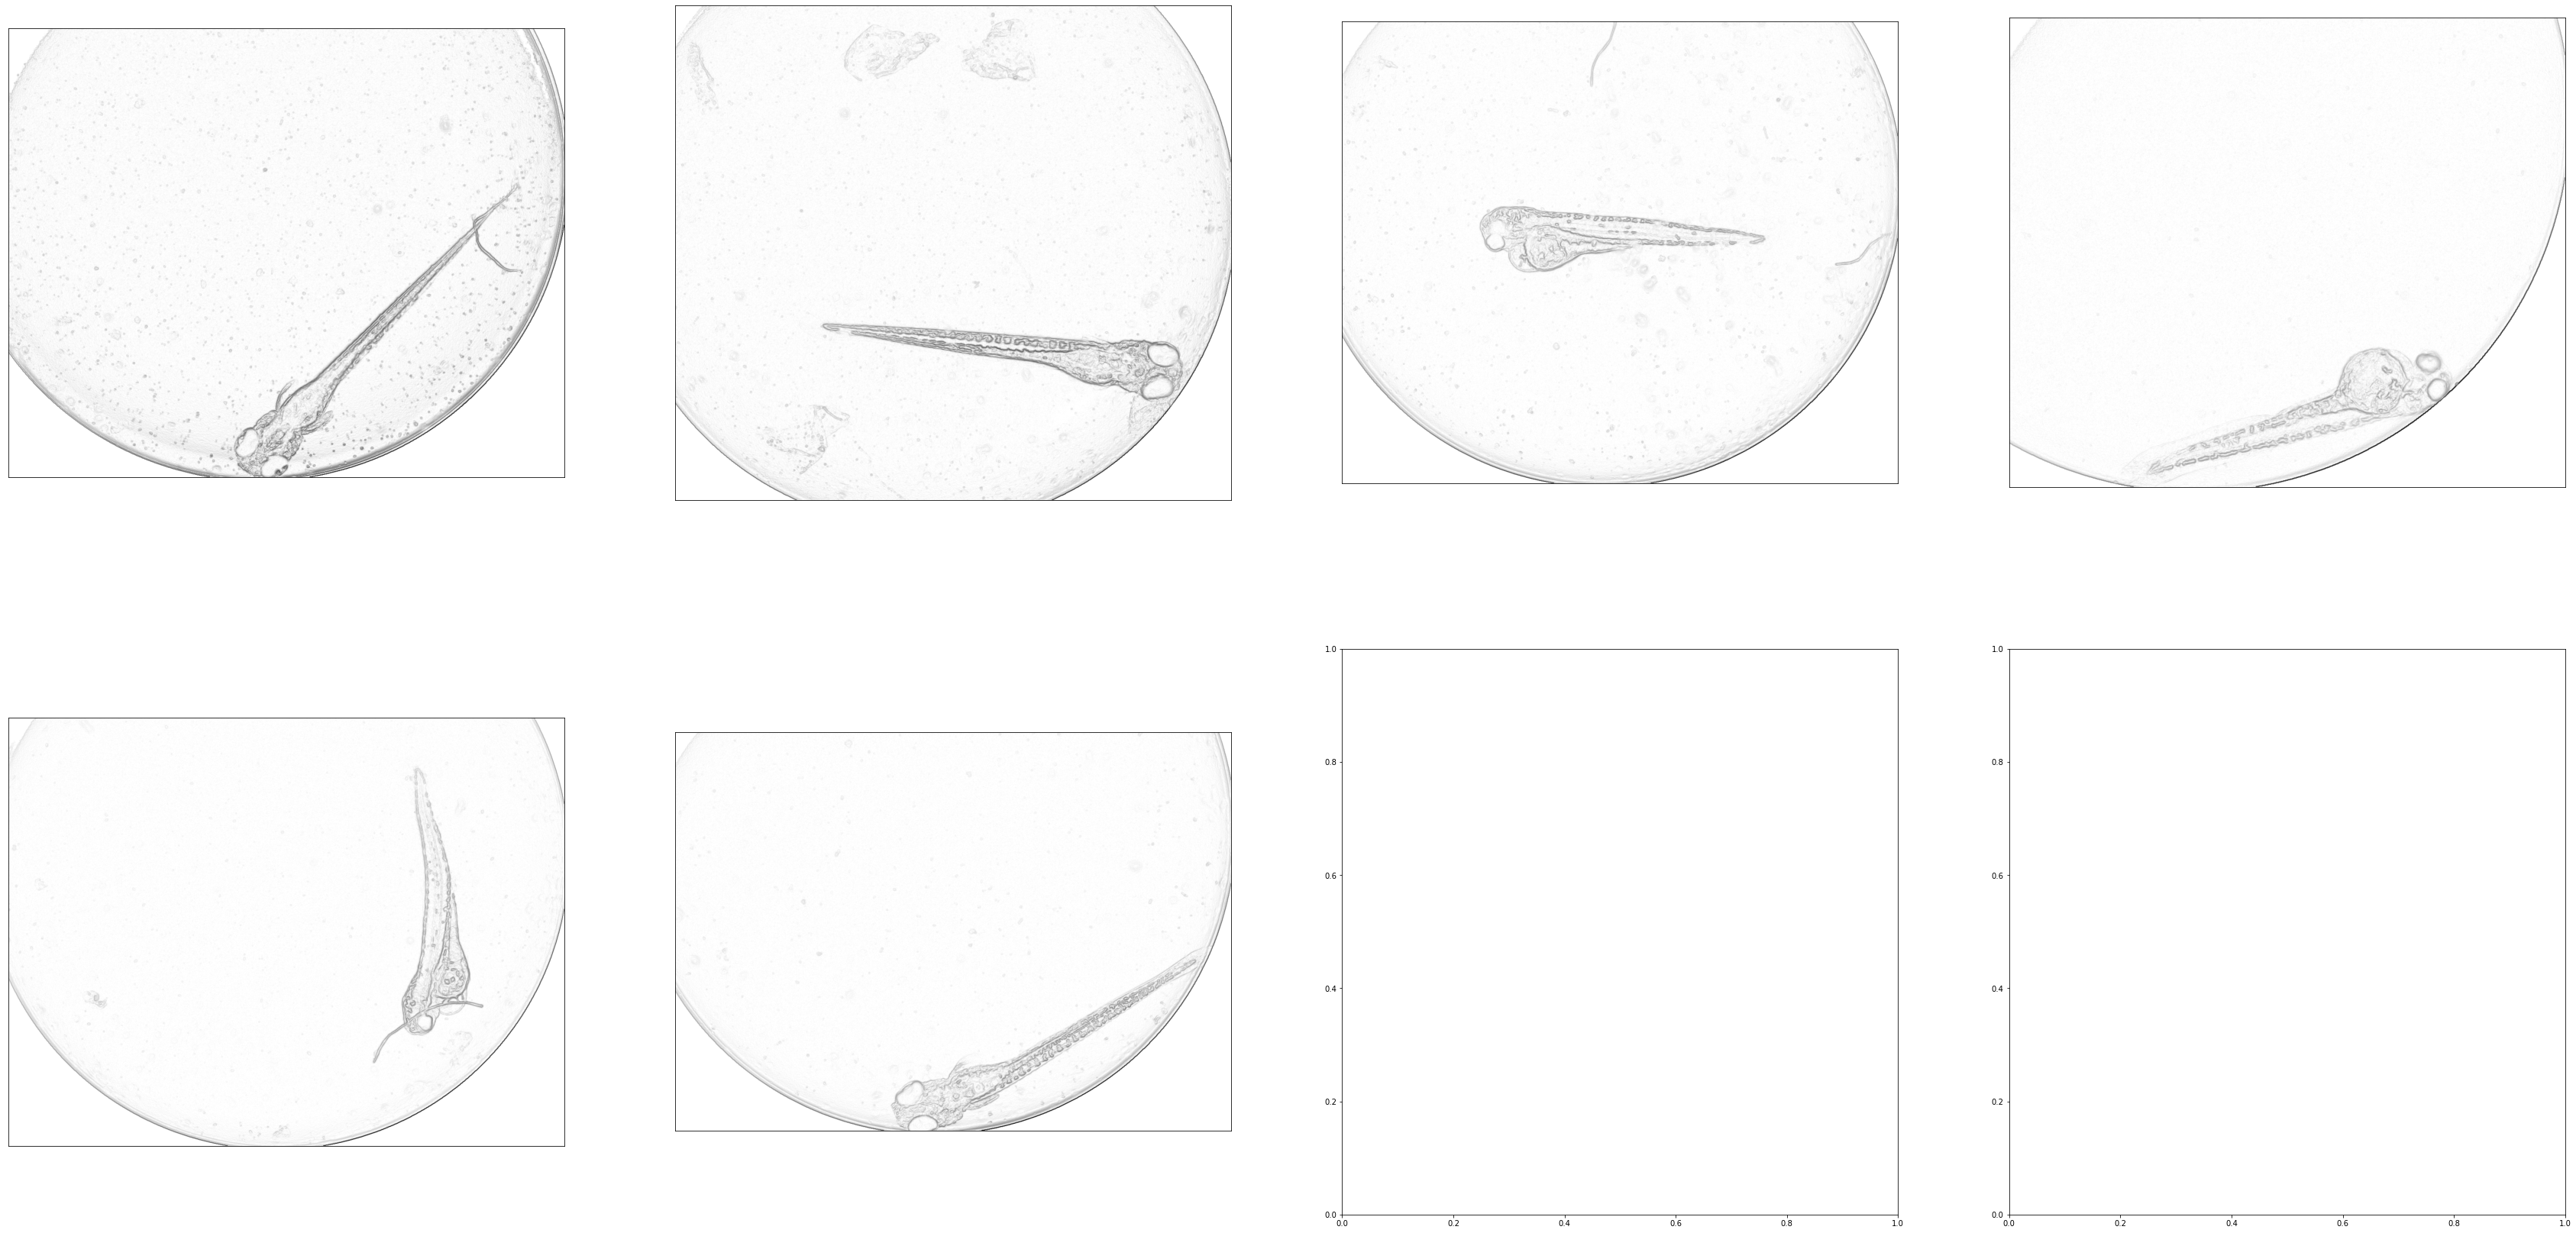

In [90]:
# plot_fishes(fishes, fig=(20, 10))
plot_images(edge, fig=(60, 30))

# Wiener filter*

In [112]:
denoised = []
# for fish in fishes:
#    fish.processed = denoising(fish.processed) # wiener filter
for fish in edge:
    denoised.append(denoising(fish, strength=15))

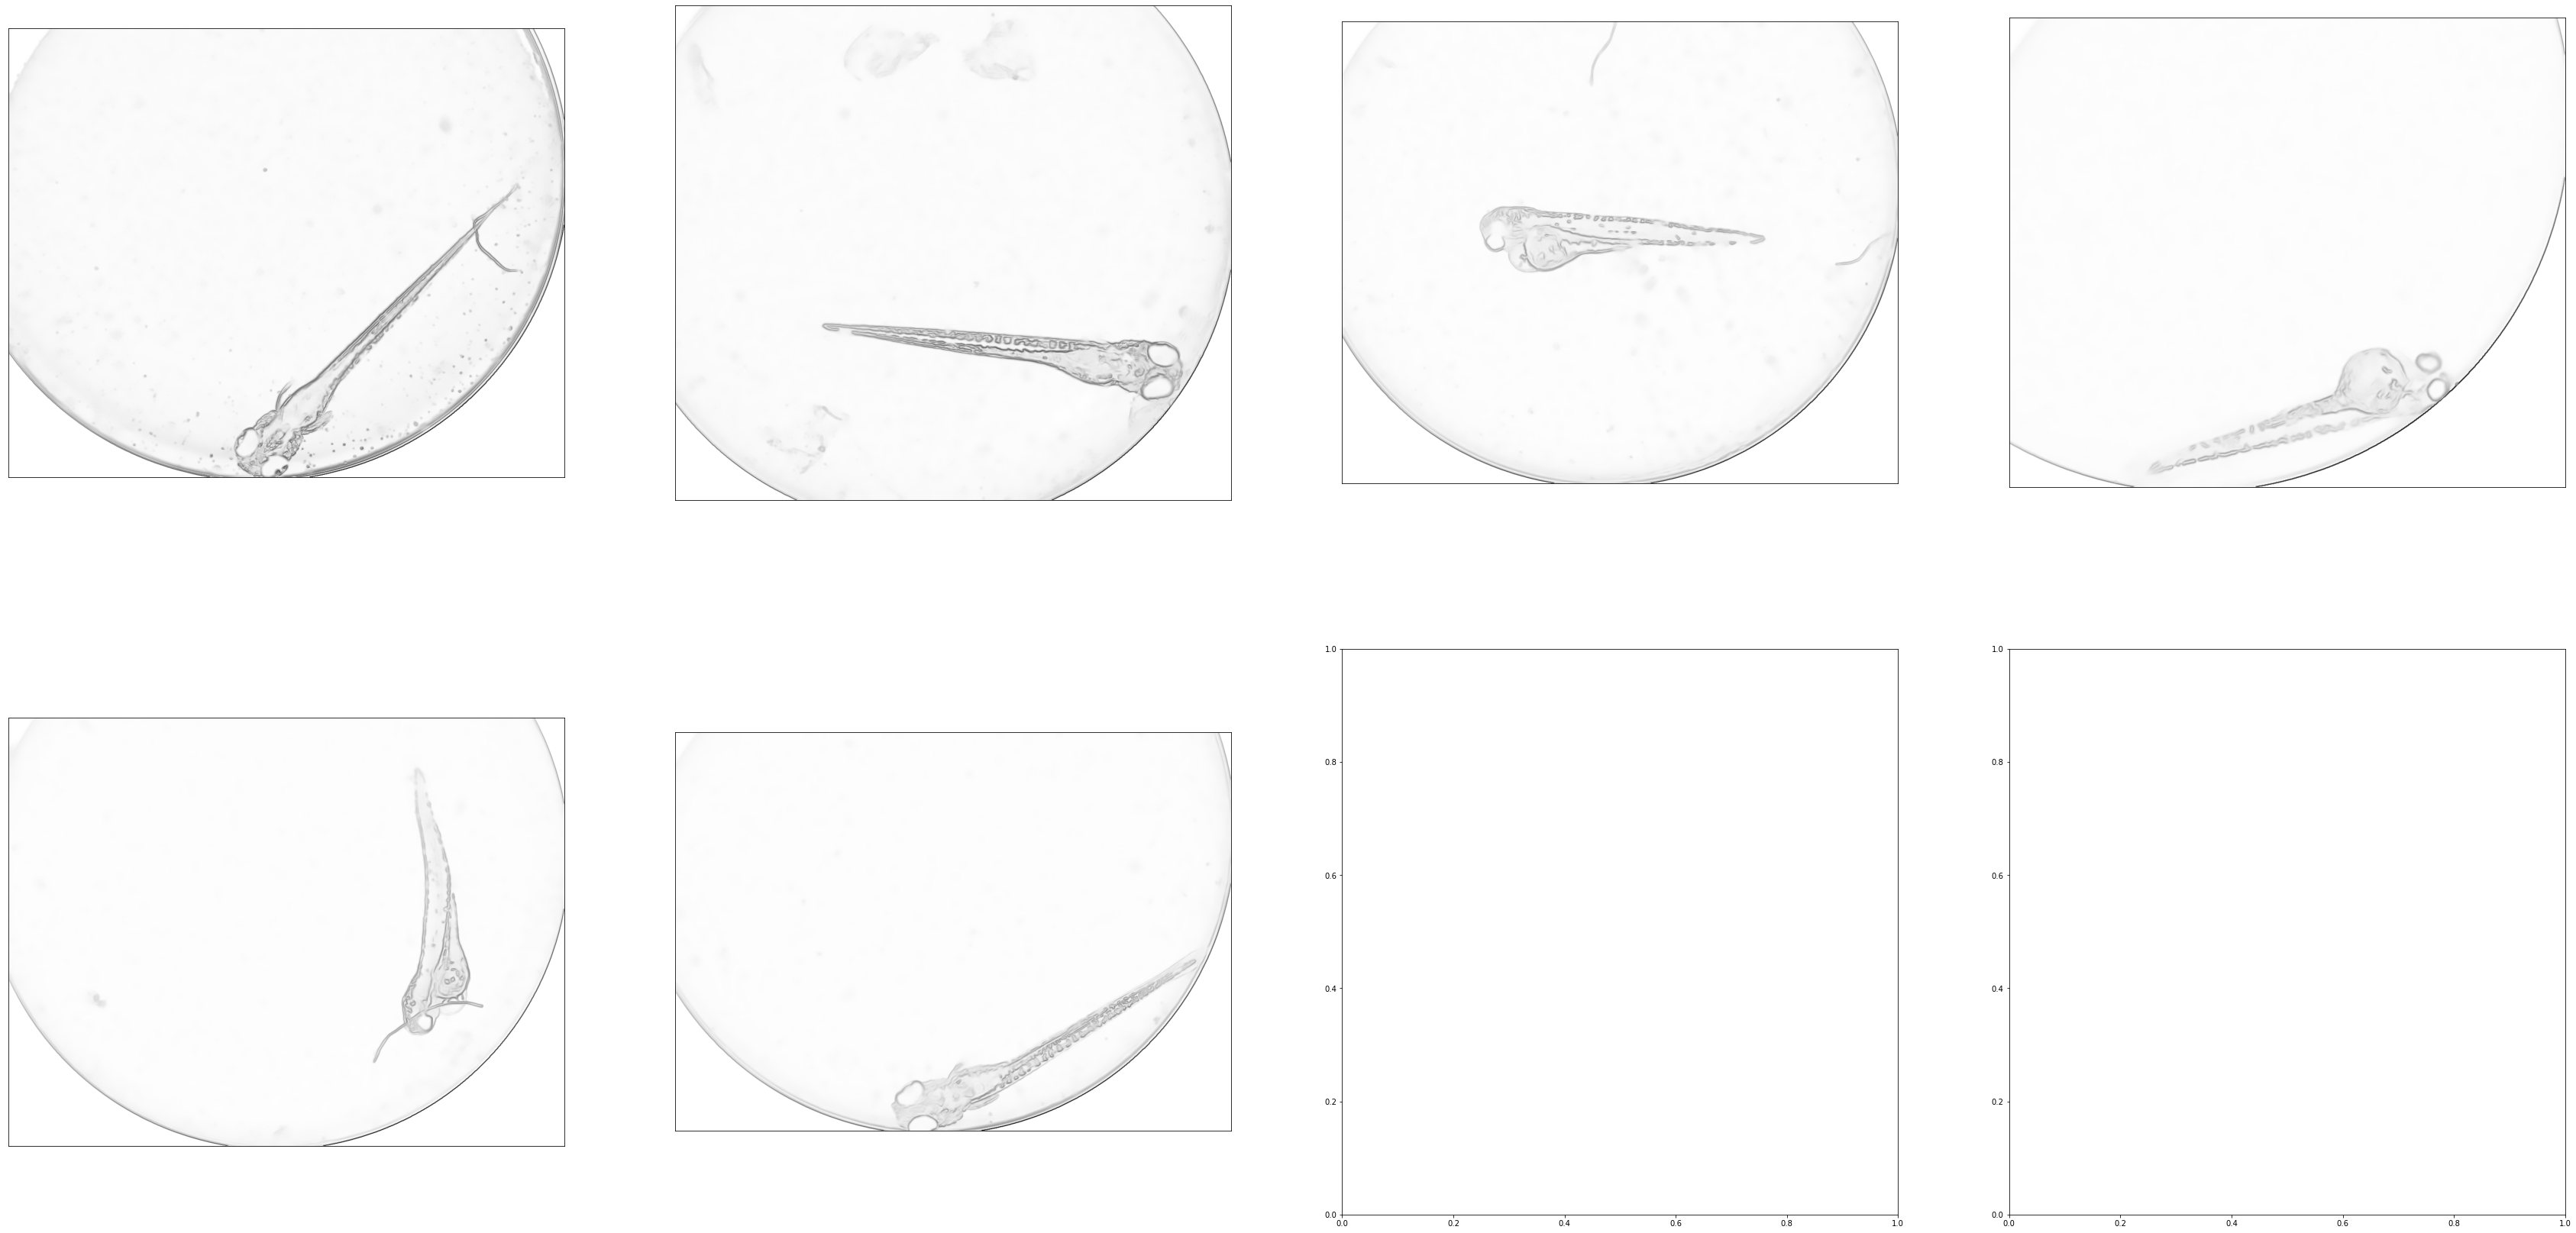

In [113]:
# plot_fishes(fishes, fig=(60, 30))
plot_images(denoised, fig=(60, 30))

# Adaptive threshold

In [124]:
ath = []
# for fish in fishes:
    # fish.processed = adaptiveTh(fish.processed)
for fish in denoised:
    ath.append(adaptiveTh(fish, block_size=11))

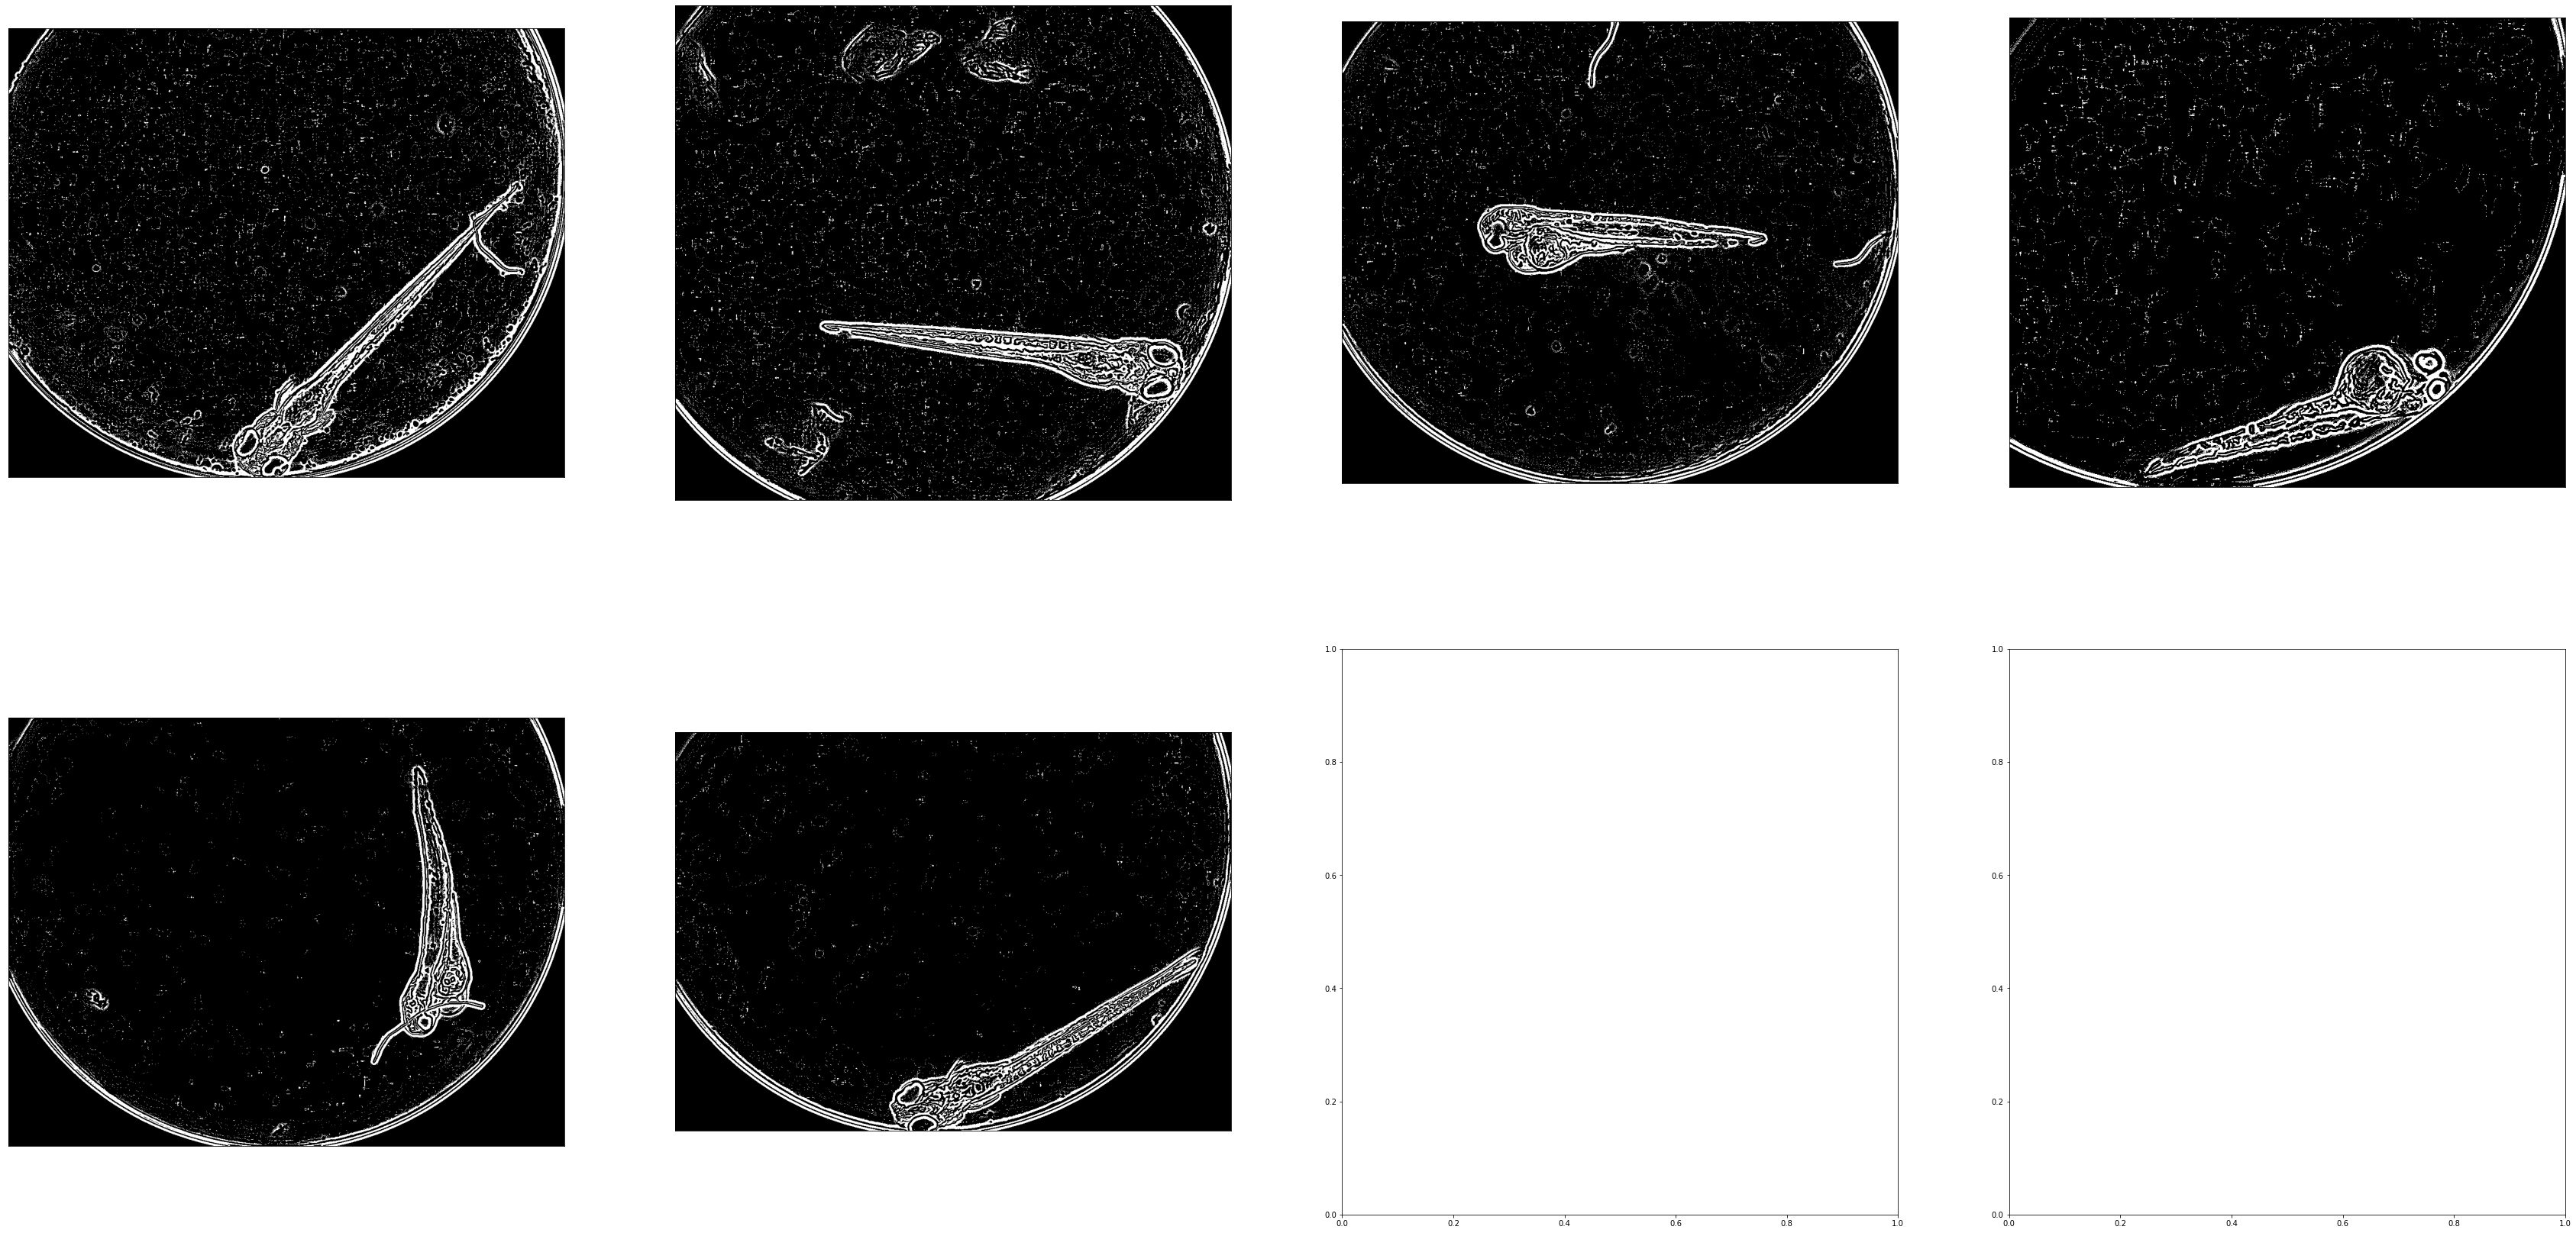

In [125]:
# plot_fishes(fishes, fig=(20, 10))
plot_images(ath, fig=(60, 30))

# bwareaopen

In [128]:
from skimage.morphology import area_opening

bwao =[]
for fish in ath:
    bwao.append(area_opening(fish,area_threshold=500))

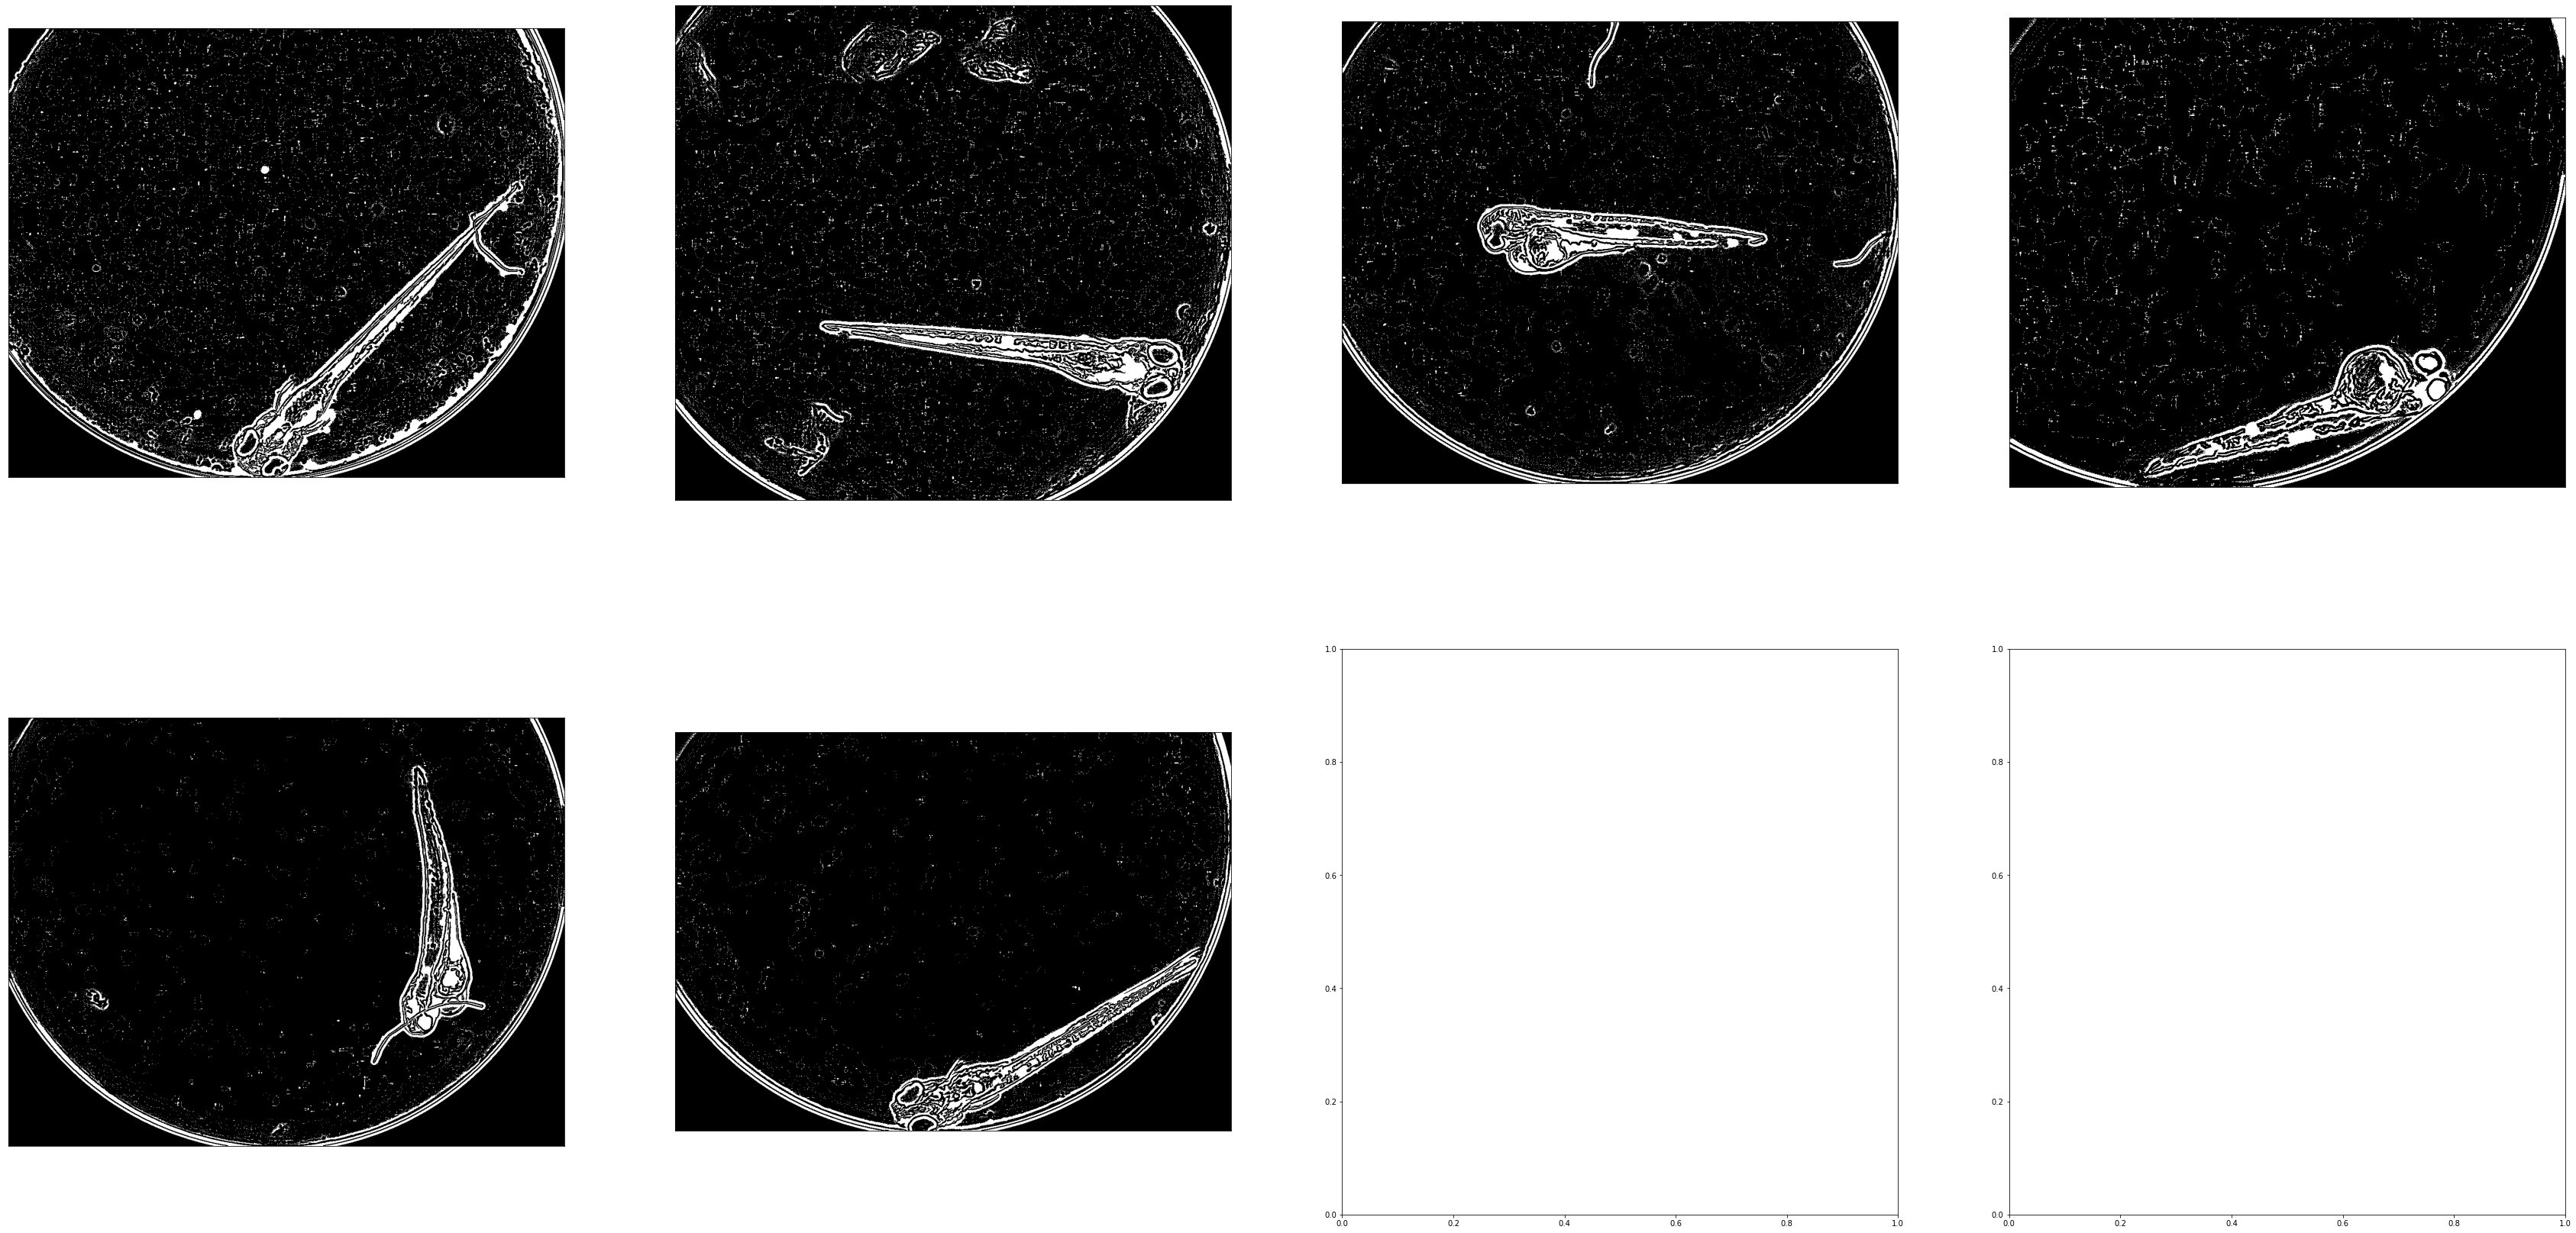

In [129]:
plot_images(bwao, fig=(60, 30))

_____________________________

In [7]:
fish = fishes[3]

# Denoise with cv2

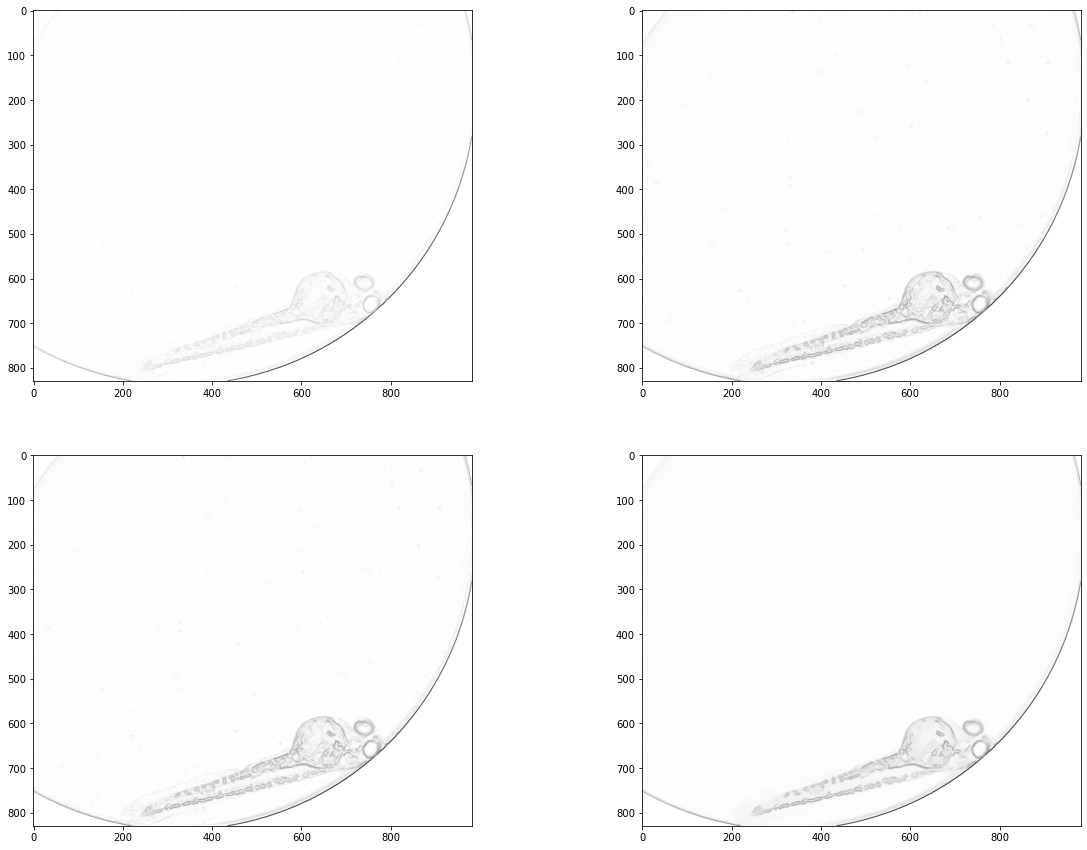

In [11]:
s = sobel(fish.processed)  # rangefilter
eah = equalize_adapthist(s)  # strech contrast
n = cv2.normalize(src=eah, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)  # normalize for uint8
a = n.astype(np.uint8)  # convert to uint8
denoised = cv2.fastNlMeansDenoising(a, None, 10)  # denoising

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
ax = ax.ravel()

ax[0].imshow(s, 'binary')
ax[1].imshow(eah, 'binary')
ax[2].imshow(a, 'binary')
ax[3].imshow(denoised, 'binary')

# Contour of well

[[  0.  956.5]
 [  1.  956.5]
 [  2.  956.5]
 ...
 [741.    1.5]
 [740.5   1. ]
 [740.5   0. ]]


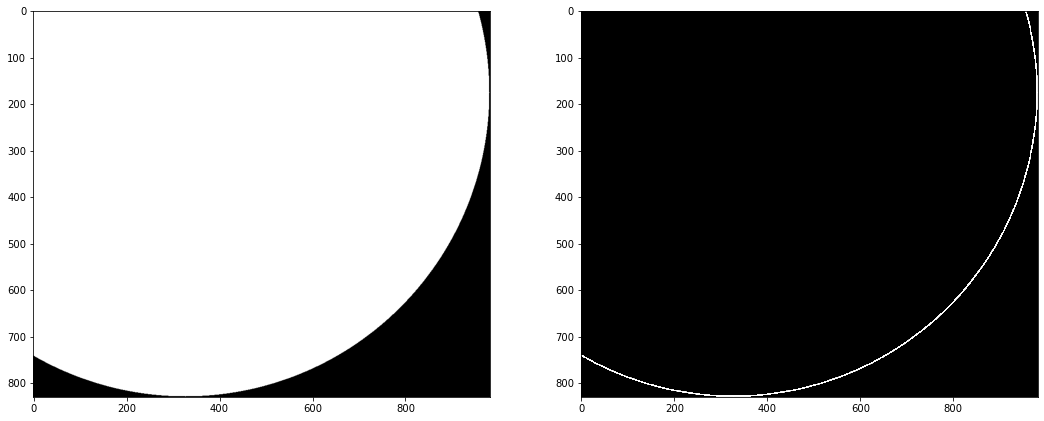

In [29]:
from skimage.measure import find_contours

mask = fish.well_props.mask.cropped

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
ax = ax.ravel()

c = np.asarray(find_contours(mask))[0]
zeros = np.zeros_like(mask)
ax[0].imshow(mask, 'gray')
print(c)

ax[1].imshow(zeros, 'gray')

for c_ in c:
    ax[1].plot(c[:, 1], c[:, 0], color='white', linewidth=0.5)



# Adaptive Threshold

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


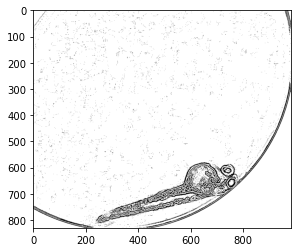

In [45]:
import math

szam = 2 * math.floor(denoised.shape[0] / 14) + 1
th = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 1)
print(th)
plt.imshow(th, 'gray')

# HOMOMORPHIC - fail

In [ ]:
from cv2 import normalize, NORM_MINMAX
from src.utils.homomorphic import homomorphic

bbox = fish.well_props.bounding_box
pre_homomorphic = fish.og[bbox.x1:bbox.x2, bbox.y1:bbox.y2]
print(pre_homomorphic.dtype)
pre_homomorphic = normalize(src=pre_homomorphic, dst=None, alpha=0, beta=1, norm_type=NORM_MINMAX)

print(pre_homomorphic)
ill_corrected = homomorphic(pre_homomorphic, a=1, b=1, cutoff=0.015, order=1)
plt.imshow(ill_corrected, 'binary')

# Wiener - fail

NameError: name 'ill_corrected' is not defined

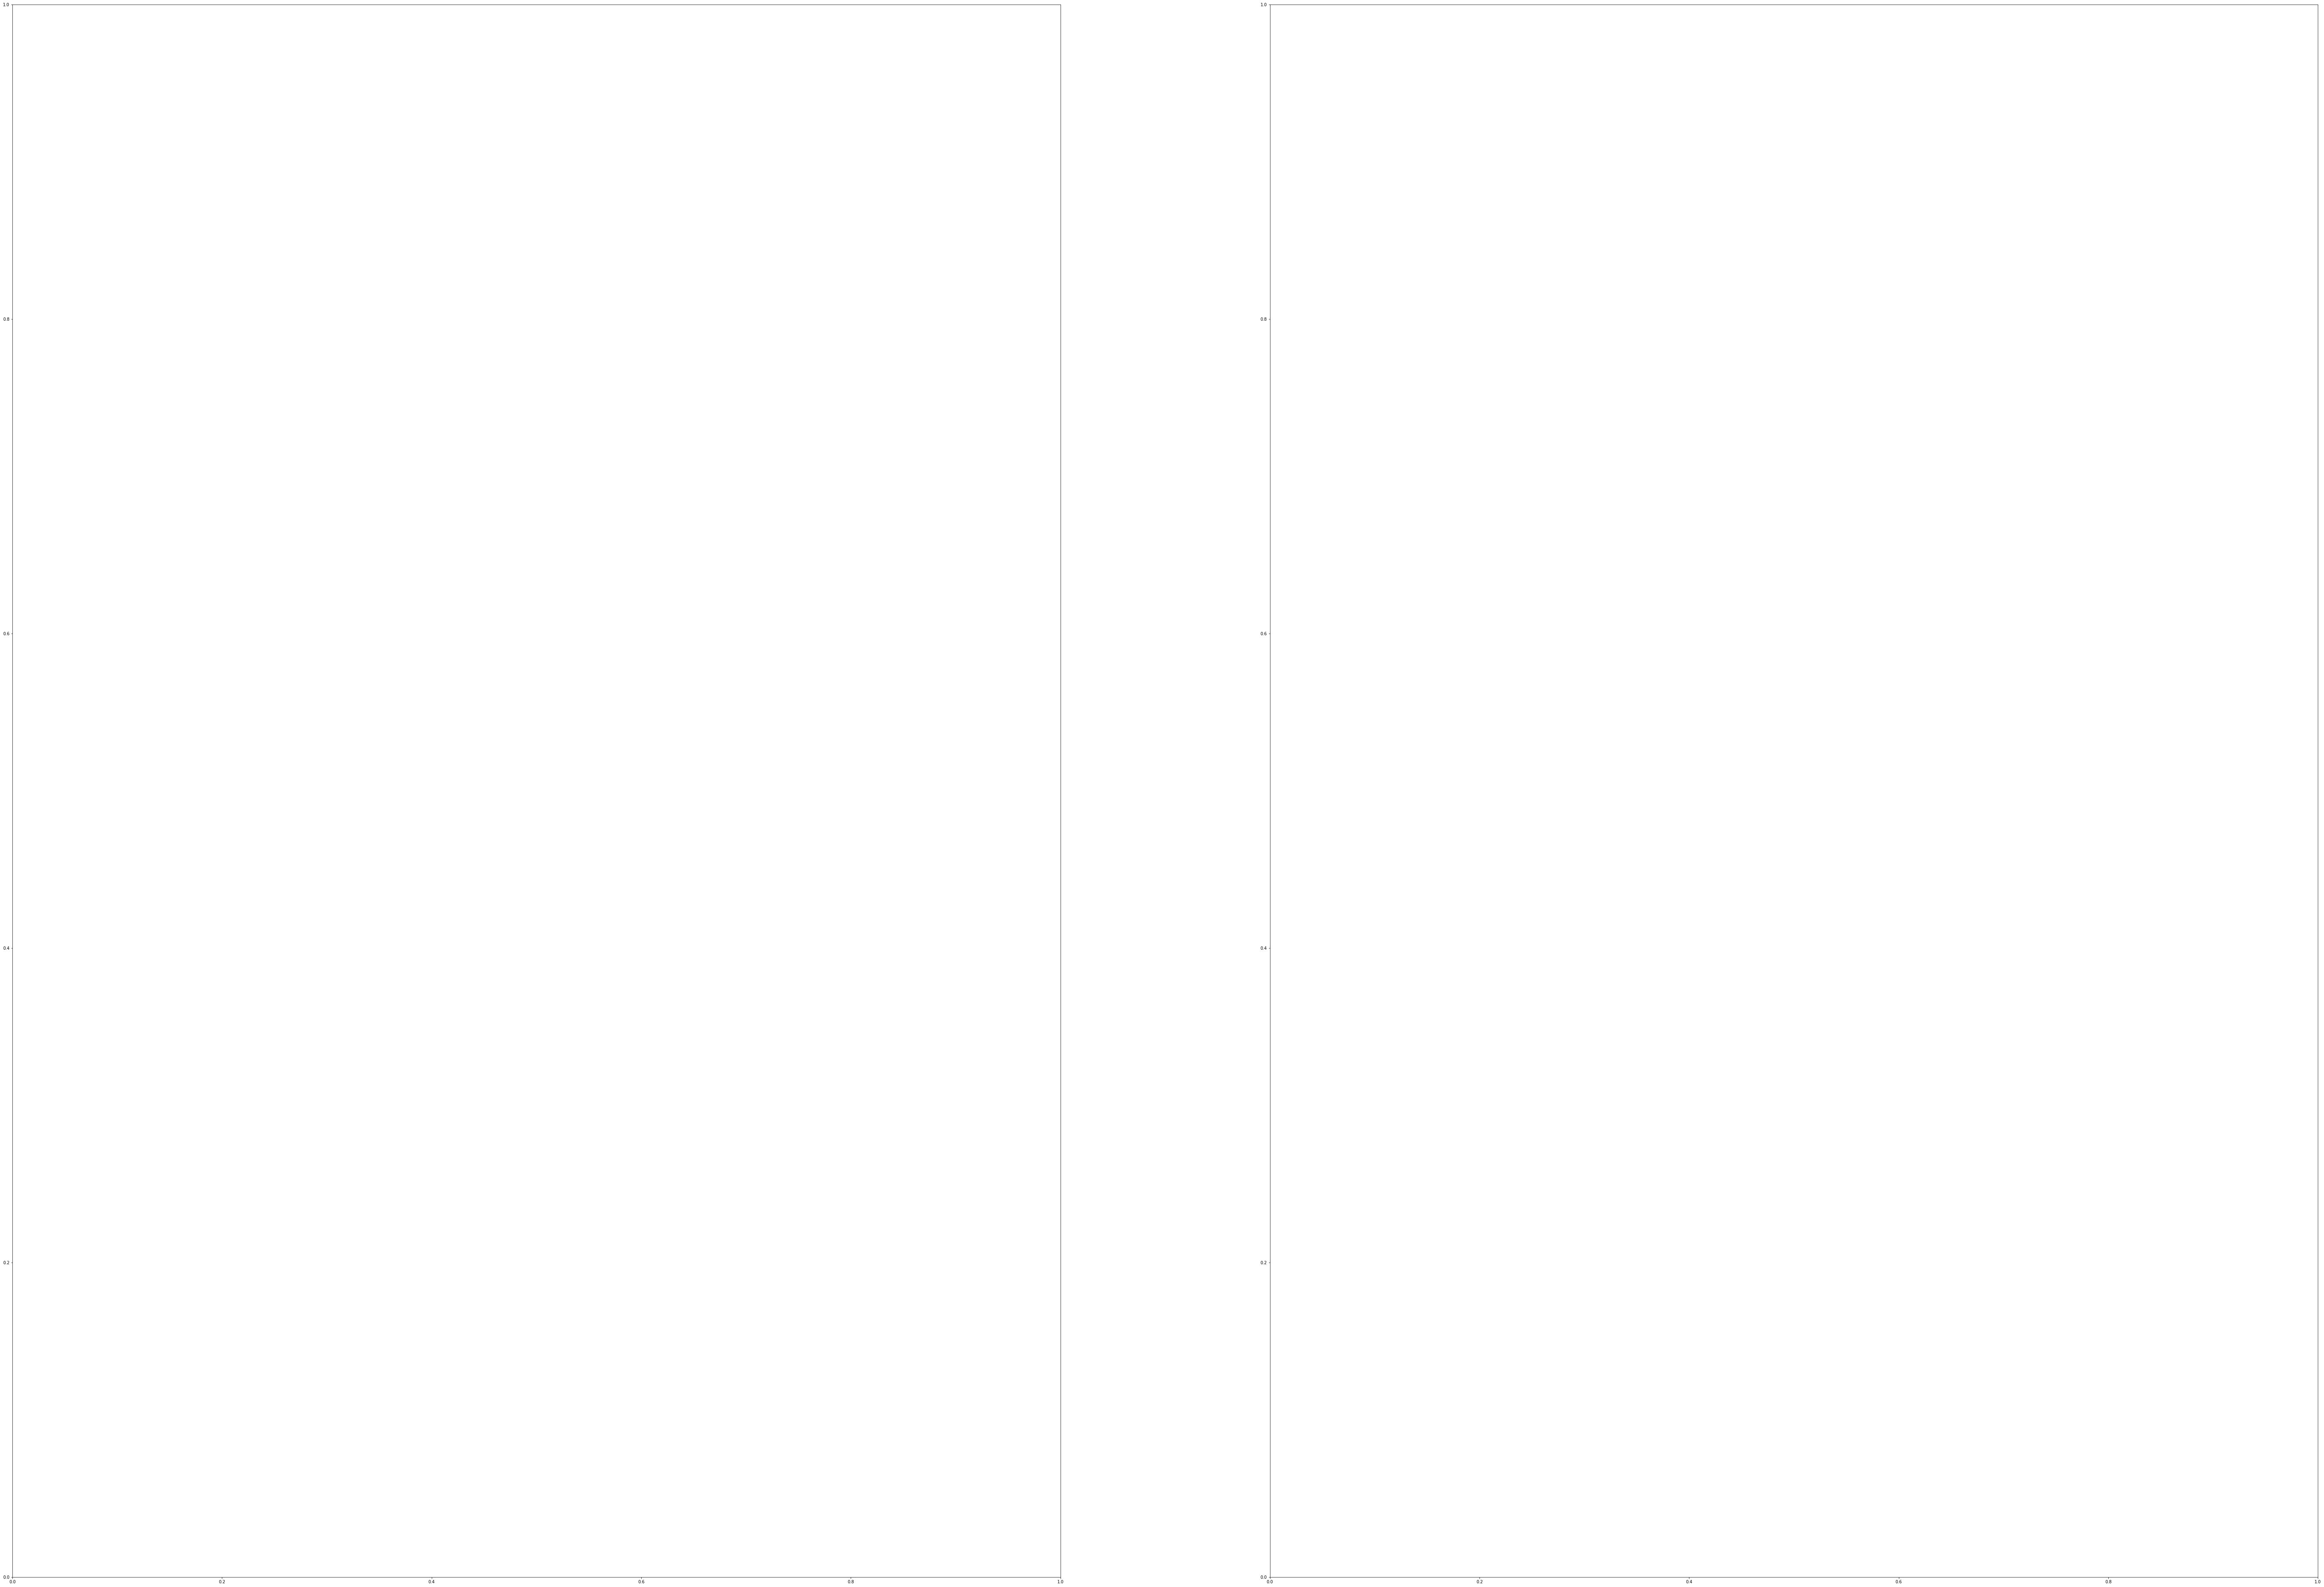

In [32]:
from scipy.signal import wiener
from skimage.filters.edges import sobel

fig, ax = plt.subplots(1, 2, figsize=(100, 70))
ax = ax.ravel()

sob = sobel(ill_corrected)
win = wiener(ill_corrected, (30, 30))

ax[0].imshow(sob, 'binary')
ax[1].imshow(win, 'binary')

In [ ]:
import numpy as np
from skimage import restoration

img = sob
from scipy.signal import convolve2d

psf = np.ones((5, 5))
img = convolve2d(sob, psf, 'same')
rng = np.random.default_rng()
img += 0.1 * img.std() * rng.standard_normal(img.shape)

deconvolved_img = restoration.wiener(sob, psf, 1000)
plt.imshow(deconvolved_img, 'binary')